# Korban Kekerasan di Jawa Barat

# Scrapping

In [3]:
import os
import requests
import pandas as pd

url = 'https://opendata.jabarprov.go.id/api-backend/bigdata/dp3akb/od_15434_jml_korban_kekerasan__pekerjaan_jk_kabupatenkota?limit=1728'
response = requests.get(url=url).json()
df = pd.DataFrame(response['data'])
df.to_csv(r'Dataset/Jumlah Kekerasan di Jawa Barat Berdasarkan Pekerjaan dan Jenis Kelamin.csv', index=False)

file_path = r'Dataset/Jumlah Kekerasan di Jawa Barat Berdasarkan Pekerjaan dan Jenis Kelamin.csv'
if os.path.isfile(file_path) :
    print('File Berhasil Dibuat')
else :
    print('File Gagal Dibuat')

File Berhasil Dibuat


# Visualisasi Data

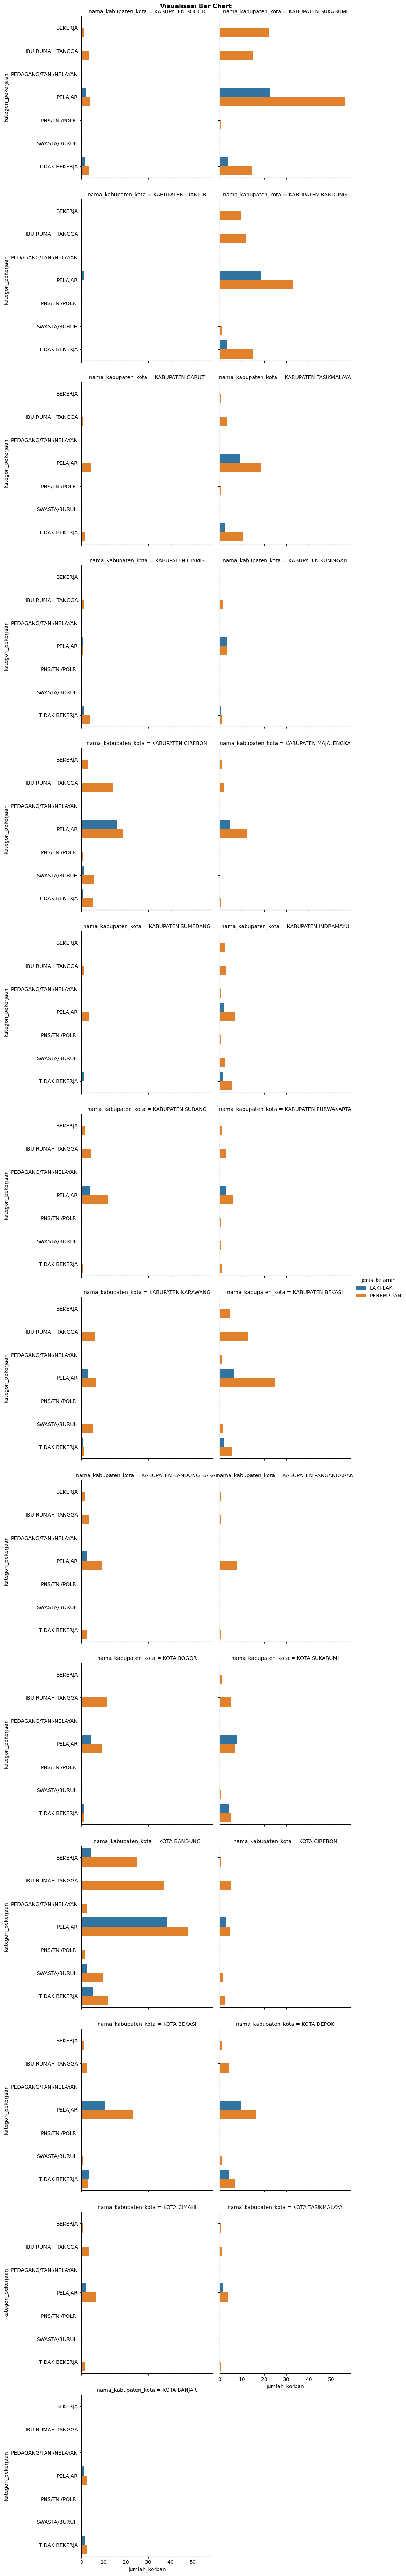

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Dataset/Jumlah Kekerasan di Jawa Barat Berdasarkan Pekerjaan dan Jenis Kelamin.csv')

sns.catplot(data=df, kind='bar', x='jumlah_korban', y='kategori_pekerjaan', col='nama_kabupaten_kota', hue='jenis_kelamin', 
            ci=None, col_wrap=2).fig.suptitle("Visualisasi Bar Chart", y=1, fontweight='bold')
sns.despine()
plt.show()

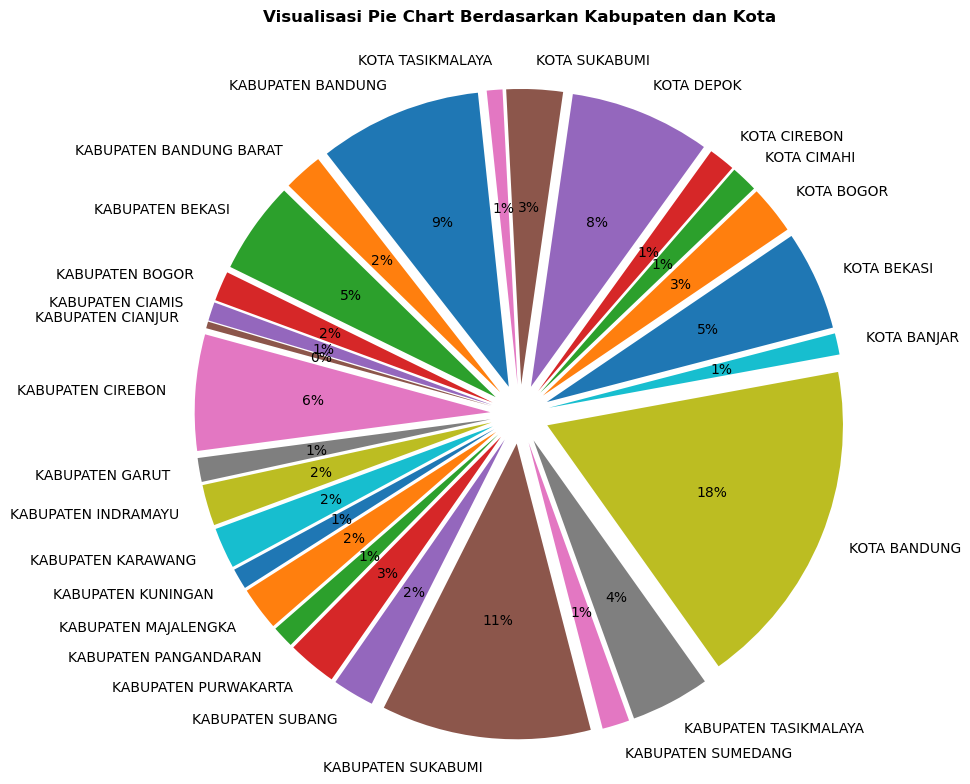

In [13]:
kategoripekerjaan = df.groupby(['kategori_pekerjaan'])['jumlah_korban'].agg(lambda s: s.sum())
kategoripekerjaan = kategoripekerjaan.to_frame()
kabupaten = df.groupby(['nama_kabupaten_kota'])['jumlah_korban'].agg(lambda s: s.sum())
kabupaten = kabupaten.to_frame()
kelamin = df.groupby(['jenis_kelamin'])['jumlah_korban'].agg(lambda s: s.sum())
kelamin = kelamin.to_frame()
tahun = df.groupby(['tahun'])['jumlah_korban'].agg(lambda s: s.sum())
tahun = tahun.to_frame()

explode = [0.2, 0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]
plt.title("Visualisasi Pie Chart Berdasarkan Kabupaten dan Kota", pad=150, fontweight='bold')
plt.pie(kabupaten["jumlah_korban"], labels=kabupaten.index, radius=2, autopct='%1.0f%%', startangle=96, explode=explode)
plt.show()

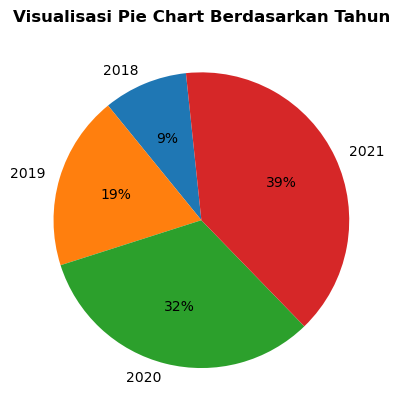

In [14]:
plt.title("Visualisasi Pie Chart Berdasarkan Tahun", pad=10, fontweight='bold')
plt.pie(tahun["jumlah_korban"], labels=tahun.index, autopct='%1.0f%%', startangle=96)
plt.show()

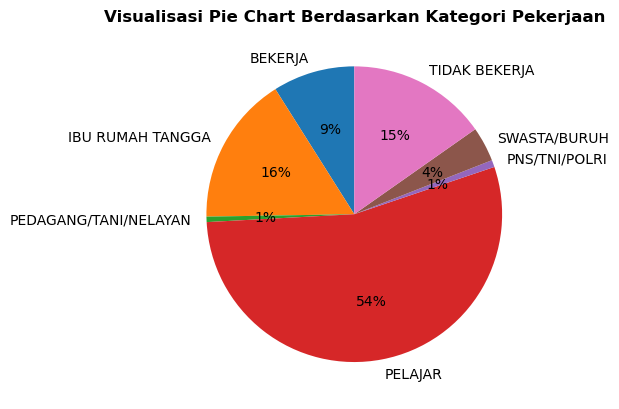

In [15]:
plt.title("Visualisasi Pie Chart Berdasarkan Kategori Pekerjaan", fontweight='bold')
plt.pie(kategoripekerjaan["jumlah_korban"], labels=kategoripekerjaan.index, autopct='%1.0f%%', startangle=90)
plt.show()

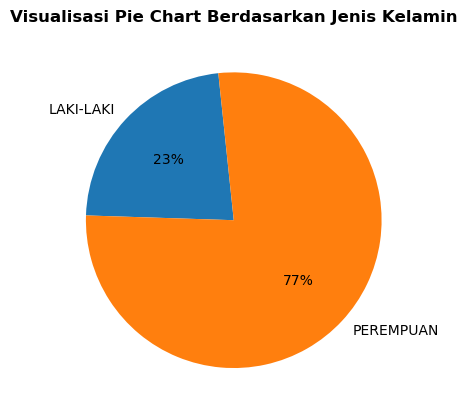

In [16]:
plt.title("Visualisasi Pie Chart Berdasarkan Jenis Kelamin", pad=10, fontweight='bold')
plt.pie(kelamin["jumlah_korban"], labels=kelamin.index, autopct='%1.0f%%', startangle=96)
plt.show()

# GIS

In [1]:
import pandas as pd
import geopandas as gpd

df = pd.read_csv('Dataset/Jumlah Kekerasan di Jawa Barat Berdasarkan Pekerjaan dan Jenis Kelamin.csv')

kotaawal = ['KABUPATEN BOGOR', 'KABUPATEN SUKABUMI', 'KABUPATEN CIANJUR', 'KABUPATEN BANDUNG', 'KABUPATEN GARUT',
            'KABUPATEN TASIKMALAYA', 'KABUPATEN CIAMIS', 'KABUPATEN KUNINGAN', 'KABUPATEN CIREBON', 'KABUPATEN MAJALENGKA',
            'KABUPATEN SUMEDANG', 'KABUPATEN INDRAMAYU', 'KABUPATEN SUBANG', 'KABUPATEN PURWAKARTA', 'KABUPATEN KARAWANG',
            'KABUPATEN BEKASI', 'KABUPATEN BANDUNG BARAT', 'KABUPATEN PANGANDARAN', 'KOTA BOGOR', 'KOTA SUKABUMI',
            'KOTA BANDUNG', 'KOTA CIREBON', 'KOTA BEKASI', 'KOTA DEPOK', 'KOTA CIMAHI', 'KOTA TASIKMALAYA', 'KOTA BANJAR']
kotabaru = ['BOGOR', 'SUKABUMI', 'CIANJUR', 'BANDUNG', 'GARUT', 'TASIKMALAYA', 'CIAMIS', 'KUNINGAN', 'CIREBON', 'MAJALENGKA', 
            'SUMEDANG', 'INDRAMAYU', 'SUBANG', 'PURWAKARTA', 'KARAWANG', 'BEKASI', 'BANDUNG BARAT', 'PANGANDARAN', 
            'KOTA BOGOR', 'KOTA SUKABUMI', 'KOTA BANDUNG', 'KOTA CIREBON', 'KOTA BEKASI', 'KOTA DEPOK', 'KOTA CIMAHI', 
            'KOTA TASIKMALAYA', 'KOTA BANJAR']
ganti = dict(zip(kotaawal, kotabaru))
df['nama_kabupaten_kota'].replace(ganti, inplace=True)

print('== Pilihan Pekerjaan ==')
print('1. BEKERJA')
print('2. IBU RUMAH TANGGA')
print('3. PEDAGANG/TANI/NELAYAN')
print('4. PELAJAR')
print('5. PNS/TNI/POLRI')
print('6. SWASTA/BURUH')
print('7.TIDAK BEKERJA\n')

try :
    inputpekerjaan = int(input("Pilih Pekerjaan [1|2|3|4|5|6|7] : "))
except ValueError :
    raise ValueError('Pilihan Harus Angka')
    
if inputpekerjaan == 1:
    pekerjaan = 'BEKERJA'
elif inputpekerjaan == 2:
    pekerjaan = 'IBU RUMAH TANGGA'
elif inputpekerjaan == 3:
    pekerjaan = 'PEDAGANG/TANI/NELAYAN'
elif inputpekerjaan == 4:
    pekerjaan = 'PELAJAR'
elif inputpekerjaan == 5:
    pekerjaan = 'PNS/TNI/POLRI'
elif inputpekerjaan == 6:
    pekerjaan = 'SWASTA/BURUH'
elif inputpekerjaan == 7:
    pekerjaan = 'TIDAK BEKERJA'
elif inputpekerjaan < 1 :
    raise ValueError(f'Input Tidak Boleh Kurang Dari 1')
elif inputpekerjaan > 7 :
    raise ValueError(f'Input Tidak Boleh Lebih Dari 7')

print('\n== Pilihan Jenis Kelamin ==')
print('1. LAKI-LAKI')
print('2. PEREMPUAN\n')

try :
    inputkelamin = int(input("Pilih Jenis Kelamin [1|2] : "))
except ValueError :
    raise ValueError('Pilihan Harus Angka')

if inputkelamin == 1:
    kelamin = 'LAKI-LAKI'
elif inputkelamin == 2:
    kelamin = 'PEREMPUAN'
elif inputkelamin < 1 :
    raise ValueError(f'Input Tidak Boleh Kurang Dari 1')
elif inputkelamin > 2 :
    raise ValueError(f'Input Tidak Boleh Lebih Dari 2')

df = df.loc[df.kategori_pekerjaan == pekerjaan]
df = df.loc[df.jenis_kelamin == kelamin]
jumlah_df = df.groupby(['nama_kabupaten_kota', 'kategori_pekerjaan', 
                        'jenis_kelamin'])['jumlah_korban'].agg(lambda s: s.sum())
jumlah_df = jumlah_df.to_frame()
jumlah_df.reset_index(level=['nama_kabupaten_kota', 'kategori_pekerjaan', 'jenis_kelamin'], inplace=True)

gdf = gpd.read_file('Dataset/Jabar_By_Kab.geojson')
merged = gdf.set_index('KABKOT').join(jumlah_df.set_index('nama_kabupaten_kota'))
merged.explore(column='jumlah_korban', cmap='Set1', legend=True, legend_kwds={'caption': "Jumlah Korban"}, tooltip=False, 
               popup=['KABKOT','jumlah_korban', 'kategori_pekerjaan', 'jenis_kelamin'], style_kwds=dict(color="black"))

== Pilihan Pekerjaan ==
1. BEKERJA
2. IBU RUMAH TANGGA
3. PEDAGANG/TANI/NELAYAN
4. PELAJAR
5. PNS/TNI/POLRI
6. SWASTA/BURUH
7.TIDAK BEKERJA


== Pilihan Jenis Kelamin ==
1. LAKI-LAKI
2. PEREMPUAN

